MRINAL KADAM USC ID: 3135945534

In [1]:
# Import all required packages and libraries

import pandas as pd 
import numpy as np

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, hamming_loss, silhouette_score

from IPython.display import Image

import warnings

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

# (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
# Read the input file into a dataframe

df = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
# Split the dataframe into x and y
# Ignore the RecordID column

x = df.iloc[:,:22]
y = df.iloc[:,22:25]

In [4]:
x

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [5]:
y

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [6]:
# Splitting the varaibles as training and testing in a ratio of 70 to 30 randomly

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

# (i) Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Methods for evaluating multi-label classification:-

Exact Match Ratio (EMR):
Computes the percentage of samples that have all of their labels classified correctly.

Hamming Loss:
Computes the fraction of labels that are incorrectly predicted.

# (ii) Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

Weight of the SVM penalty: C
Width of the Gaussian Kernel: gamma

In [7]:
# Define functions

def exact_match_ratio(y_total, y_pr_total):
    return np.sum(np.all(np.equal(y_total, y_pr_total), axis=1)) / y_total.shape[0]

def hamming_loss_fn(y_total, y_pr_total):
    return np.mean((np.sum((np.not_equal(y_total, y_pr_total)), axis=1) / y_total.shape[1]))

In [8]:
# Raw Attributes

parameters = {'C':np.logspace(1,5,num=5),'gamma':np.logspace(-5,2,num=8)}

print("---------------------Raw Features---------------------")
print('\n')

for label_index in range(y_train.shape[1]):
    y_train_label = y_train.iloc[:, label_index]
    y_test_label = y_test.iloc[:, label_index]
    
    svm_model = SVC(kernel='rbf', decision_function_shape='ovr',random_state=100)
    gridCV = GridSearchCV(svm_model, parameters, cv=10, n_jobs=-1).fit(x_train, y_train_label)
    
    y_pred_tr = gridCV.predict(x_train)
    y_pred = gridCV.predict(x_test)
    
    print("----" + y_train.columns[label_index] + "----")
    print("Best Parameters: ", gridCV.best_params_)    
    print("Exact Match Ratio(Accuracy): ", accuracy_score(y_test_label, y_pred))
    print("Hamming Loss: ", hamming_loss(y_test_label, y_pred))    
    print('\n')    
    
    if label_index==0:
        y_train_family = y_train_label.copy(deep=True)
        y_test_family = y_test_label.copy(deep=True)
        
        y_pred_tr_family = y_pred_tr
        y_pred_family = y_pred
    elif label_index==1:
        y_train_genus = y_train_label.copy(deep=True)
        y_test_genus = y_test_label.copy(deep=True)
        
        y_pred_tr_genus = y_pred_tr
        y_pred_genus = y_pred
    else:
        y_train_species = y_train_label.copy(deep=True)
        y_test_species = y_test_label.copy(deep=True)
        
        y_pred_tr_species = y_pred_tr
        y_pred_species = y_pred   

y_train_total = np.column_stack((y_train_family, y_train_genus, y_train_species))
y_test_total = np.column_stack((y_test_family, y_test_genus, y_test_species))

y_pred_tr_total = np.column_stack((y_pred_tr_family, y_pred_tr_genus, y_pred_tr_species))
y_pred_total = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))

print("-------------------Train-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_train_total, y_pred_tr_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_train_total, y_pred_tr_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_train_total, y_pred_tr_total)))
print('\n')

print("-------------------Test-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_test_total, y_pred_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_test_total, y_pred_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_test_total, y_pred_total)))

---------------------Raw Features---------------------


----Family----
Best Parameters:  {'C': 100.0, 'gamma': 1.0}
Exact Match Ratio(Accuracy):  0.9949050486336267
Hamming Loss:  0.005094951366373321


----Genus----
Best Parameters:  {'C': 100.0, 'gamma': 1.0}
Exact Match Ratio(Accuracy):  0.9935155164427976
Hamming Loss:  0.006484483557202408


----Species----
Best Parameters:  {'C': 10.0, 'gamma': 1.0}
Exact Match Ratio(Accuracy):  0.9939786938397406
Hamming Loss:  0.006021306160259379


-------------------Train-------------------


Total Exact Match Ratio(Accuracy):  0.9988085782366958
Total Hamming Loss:  0.0003971405877680699
Total Hamming Score:  0.9996028594122319


-------------------Test-------------------


Total Exact Match Ratio(Accuracy):  0.9902732746641963
Total Hamming Loss:  0.005866913694611703
Total Hamming Score:  0.9941330863053883


In [9]:
# Standardization

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

parameters = {'C':np.logspace(1,5,num=5),'gamma':np.logspace(-5,2,num=8)}

print("---------------------After Standardization---------------------")
print('\n')

for label_index in range(y_train.shape[1]):
    y_train_label = y_train.iloc[:, label_index]
    y_test_label = y_test.iloc[:, label_index]
    
    svm_model = SVC(kernel='rbf', decision_function_shape='ovr',random_state=100)
    gridCV = GridSearchCV(svm_model, parameters, cv=10, n_jobs=-1).fit(x_train_std, y_train_label)
    
    y_pred_tr_std = gridCV.predict(x_train_std)
    y_pred_std = gridCV.predict(x_test_std)
    
    print("----" + y_train.columns[label_index] + "----")
    print("Best Parameters: ", gridCV.best_params_)     
    print("Exact Match Ratio(Accuracy): ", accuracy_score(y_test_label, y_pred_std))
    print("Hamming Loss: ", hamming_loss(y_test_label, y_pred_std))   
    print('\n')
    
    if label_index==0:
        y_train_family = y_train_label.copy(deep=True)
        y_test_family = y_test_label.copy(deep=True)
        
        y_pred_tr_family = y_pred_tr_std
        y_pred_family = y_pred_std
    elif label_index==1:
        y_train_genus = y_train_label.copy(deep=True)
        y_test_genus = y_test_label.copy(deep=True)
        
        y_pred_tr_genus = y_pred_tr_std
        y_pred_genus = y_pred_std
    else:
        y_train_species = y_train_label.copy(deep=True)
        y_test_species = y_test_label.copy(deep=True)
        
        y_pred_tr_species = y_pred_tr_std
        y_pred_species = y_pred_std   

y_train_total = np.column_stack((y_train_family, y_train_genus, y_train_species))
y_test_total = np.column_stack((y_test_family, y_test_genus, y_test_species))

y_pred_tr_total = np.column_stack((y_pred_tr_family, y_pred_tr_genus, y_pred_tr_species))
y_pred_total = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))

print("-------------------Train-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_train_total, y_pred_tr_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_train_total, y_pred_tr_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_train_total, y_pred_tr_total)))
print('\n')

print("-------------------Test-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_test_total, y_pred_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_test_total, y_pred_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_test_total, y_pred_total)))

---------------------After Standardization---------------------


----Family----
Best Parameters:  {'C': 10.0, 'gamma': 0.1}
Exact Match Ratio(Accuracy):  0.9907364520611394
Hamming Loss:  0.009263547938860583


----Genus----
Best Parameters:  {'C': 100.0, 'gamma': 0.01}
Exact Match Ratio(Accuracy):  0.9893469198703103
Hamming Loss:  0.010653080129689671


----Species----
Best Parameters:  {'C': 1000.0, 'gamma': 0.01}
Exact Match Ratio(Accuracy):  0.9898100972672533
Hamming Loss:  0.010189902732746642


-------------------Train-------------------


Total Exact Match Ratio(Accuracy):  0.999801429706116
Total Hamming Loss:  6.619009796134498e-05
Total Hamming Score:  0.9999338099020386


-------------------Test-------------------


Total Exact Match Ratio(Accuracy):  0.9819360815192218
Total Hamming Loss:  0.010035510267098964
Total Hamming Score:  0.9899644897329011


Standardization doesn't change much. This is because the the data is already normalized.

# (iii) Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross vali-dation.

In [10]:
# Raw Attributes

warnings.filterwarnings('ignore')

parameters = {'C':np.logspace(1,5,num=5)}

print("---------------------Raw Features---------------------")
print('\n')

for label_index in range(y_train.shape[1]):
    y_train_label = y_train.iloc[:, label_index]
    y_test_label = y_test.iloc[:, label_index]
    
    svm_model = LinearSVC(penalty='l1',multi_class='ovr',dual=False,random_state=100)
    gridCV = GridSearchCV(svm_model, parameters, cv=10, n_jobs=-1).fit(x_train, y_train_label)
    
    y_pred_tr = gridCV.predict(x_train)
    y_pred = gridCV.predict(x_test)
    
    print("----" + y_train.columns[label_index] + "----")
    print("Best Parameters: ", gridCV.best_params_)     
    print("Exact Match Ratio(Accuracy): ", accuracy_score(y_test_label, y_pred))
    print("Hamming Loss: ", hamming_loss(y_test_label, y_pred))    
    print('\n')
    
    if label_index==0:
        y_train_family = y_train_label.copy(deep=True)
        y_test_family = y_test_label.copy(deep=True)
        
        y_pred_tr_family = y_pred_tr
        y_pred_family = y_pred
    elif label_index==1:
        y_train_genus = y_train_label.copy(deep=True)
        y_test_genus = y_test_label.copy(deep=True)
        
        y_pred_tr_genus = y_pred_tr
        y_pred_genus = y_pred
    else:
        y_train_species = y_train_label.copy(deep=True)
        y_test_species = y_test_label.copy(deep=True)
        
        y_pred_tr_species = y_pred_tr
        y_pred_species = y_pred   

y_train_total = np.column_stack((y_train_family, y_train_genus, y_train_species))
y_test_total = np.column_stack((y_test_family, y_test_genus, y_test_species))

y_pred_tr_total = np.column_stack((y_pred_tr_family, y_pred_tr_genus, y_pred_tr_species))
y_pred_total = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))

print("-------------------Train-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_train_total, y_pred_tr_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_train_total, y_pred_tr_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_train_total, y_pred_tr_total)))
print('\n')

print("-------------------Test-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_test_total, y_pred_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_test_total, y_pred_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_test_total, y_pred_total)))

---------------------Raw Features---------------------


----Family----
Best Parameters:  {'C': 100.0}
Exact Match Ratio(Accuracy):  0.9393237610004632
Hamming Loss:  0.06067623899953682


----Genus----
Best Parameters:  {'C': 100.0}
Exact Match Ratio(Accuracy):  0.953219082908754
Hamming Loss:  0.04678091709124595


----Species----
Best Parameters:  {'C': 100.0}
Exact Match Ratio(Accuracy):  0.9620194534506716
Hamming Loss:  0.03798054654932839


-------------------Train-------------------


Total Exact Match Ratio(Accuracy):  0.9211675933280381
Total Hamming Loss:  0.04805401111993646
Total Hamming Score:  0.9519459888800635


-------------------Test-------------------


Total Exact Match Ratio(Accuracy):  0.9180176007410839
Total Hamming Loss:  0.04847923421337038
Total Hamming Score:  0.9515207657866296


In [11]:
# Standardization

warnings.filterwarnings('ignore')

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

parameters = {'C':np.logspace(1,5,num=5)}

print("---------------------After Standardization---------------------")
print('\n')

for label_index in range(y_train.shape[1]):
    y_train_label = y_train.iloc[:, label_index]
    y_test_label = y_test.iloc[:, label_index]
    
    svm_model = LinearSVC(penalty='l1',multi_class='ovr',dual=False,random_state=100)
    gridCV = GridSearchCV(svm_model, parameters, cv=10, n_jobs=-1).fit(x_train_std, y_train_label)
    
    y_pred_tr_std = gridCV.predict(x_train_std)
    y_pred_std = gridCV.predict(x_test_std)

    print("----" + y_train.columns[label_index] + "----")
    print("Best Parameters: ", gridCV.best_params_)    
    print("Exact Match Ratio(Accuracy): ", accuracy_score(y_test_label, y_pred_std))
    print("Hamming Loss: ", hamming_loss(y_test_label, y_pred_std))    
    print('\n')
    
    if label_index==0:
        y_train_family = y_train_label.copy(deep=True)
        y_test_family = y_test_label.copy(deep=True)
        
        y_pred_tr_family = y_pred_tr_std
        y_pred_family = y_pred_std
    elif label_index==1:
        y_train_genus = y_train_label.copy(deep=True)
        y_test_genus = y_test_label.copy(deep=True)
        
        y_pred_tr_genus = y_pred_tr_std
        y_pred_genus = y_pred_std
    else:
        y_train_species = y_train_label.copy(deep=True)
        y_test_species = y_test_label.copy(deep=True)
        
        y_pred_tr_species = y_pred_tr_std
        y_pred_species = y_pred_std   

y_train_total = np.column_stack((y_train_family, y_train_genus, y_train_species))
y_test_total = np.column_stack((y_test_family, y_test_genus, y_test_species))

y_pred_tr_total = np.column_stack((y_pred_tr_family, y_pred_tr_genus, y_pred_tr_species))
y_pred_total = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))

print("-------------------Train-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_train_total, y_pred_tr_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_train_total, y_pred_tr_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_train_total, y_pred_tr_total)))
print('\n')

print("-------------------Test-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_test_total, y_pred_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_test_total, y_pred_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_test_total, y_pred_total)))

---------------------After Standardization---------------------


----Family----
Best Parameters:  {'C': 10.0}
Exact Match Ratio(Accuracy):  0.9439555349698935
Hamming Loss:  0.05604446503010653


----Genus----
Best Parameters:  {'C': 10.0}
Exact Match Ratio(Accuracy):  0.952292728114868
Hamming Loss:  0.047707271885132005


----Species----
Best Parameters:  {'C': 10.0}
Exact Match Ratio(Accuracy):  0.9606299212598425
Hamming Loss:  0.03937007874015748


-------------------Train-------------------


Total Exact Match Ratio(Accuracy):  0.9217633042096902
Total Hamming Loss:  0.04706115965051628
Total Hamming Score:  0.9529388403494837


-------------------Test-------------------


Total Exact Match Ratio(Accuracy):  0.9212598425196851
Total Hamming Loss:  0.047707271885132005
Total Hamming Score:  0.952292728114868


Standardization doesn't change much. This is because the the data is already normalized.

# (iv) Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [12]:
# Raw Attributes

warnings.filterwarnings('ignore')

parameters = {'C':np.logspace(1,5,num=5)}

print("---------------------Raw Features---------------------")
print('\n')

for label_index in range(y_train.shape[1]):
    y_train_label = y_train.iloc[:, label_index]
    y_test_label = y_test.iloc[:, label_index]
    
    smote = SMOTE(random_state=100)
    x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train_label)
    
    svm_model = LinearSVC(penalty='l1',multi_class='ovr',dual=False,random_state=100)
    gridCV = GridSearchCV(svm_model, parameters, cv=10, n_jobs=-1).fit(x_train_smote, y_train_smote)
    
    y_pred_tr = gridCV.predict(x_train)
    y_pred = gridCV.predict(x_test)
    
    print("----" + y_train.columns[label_index] + "----")
    print("Best Parameters: ", gridCV.best_params_)     
    print("Exact Match Ratio(Accuracy): ", accuracy_score(y_test_label, y_pred))
    print("Hamming Loss: ", hamming_loss(y_test_label, y_pred))    
    print('\n')
    
    if label_index==0:
        y_train_family = y_train_label.copy(deep=True)
        y_test_family = y_test_label.copy(deep=True)
        
        y_pred_tr_family = y_pred_tr
        y_pred_family = y_pred
    elif label_index==1:
        y_train_genus = y_train_label.copy(deep=True)
        y_test_genus = y_test_label.copy(deep=True)
        
        y_pred_tr_genus = y_pred_tr
        y_pred_genus = y_pred
    else:
        y_train_species = y_train_label.copy(deep=True)
        y_test_species = y_test_label.copy(deep=True)
        
        y_pred_tr_species = y_pred_tr
        y_pred_species = y_pred   

y_train_total = np.column_stack((y_train_family, y_train_genus, y_train_species))
y_test_total = np.column_stack((y_test_family, y_test_genus, y_test_species))

y_pred_tr_total = np.column_stack((y_pred_tr_family, y_pred_tr_genus, y_pred_tr_species))
y_pred_total = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))

print("-------------------Train-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_train_total, y_pred_tr_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_train_total, y_pred_tr_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_train_total, y_pred_tr_total)))
print('\n')

print("-------------------Test-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_test_total, y_pred_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_test_total, y_pred_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_test_total, y_pred_total)))

---------------------Raw Features---------------------


----Family----
Best Parameters:  {'C': 10.0}
Exact Match Ratio(Accuracy):  0.9147753589624826
Hamming Loss:  0.08522464103751737


----Genus----
Best Parameters:  {'C': 1000.0}
Exact Match Ratio(Accuracy):  0.9087540528022232
Hamming Loss:  0.09124594719777675


----Species----
Best Parameters:  {'C': 1000.0}
Exact Match Ratio(Accuracy):  0.9546086150995832
Hamming Loss:  0.04539138490041686


-------------------Train-------------------


Total Exact Match Ratio(Accuracy):  0.869340746624305
Total Hamming Loss:  0.06605771776542228
Total Hamming Score:  0.9339422822345778


-------------------Test-------------------


Total Exact Match Ratio(Accuracy):  0.8508568781843446
Total Hamming Loss:  0.07395399104523699
Total Hamming Score:  0.926046008954763


In [13]:
# Standardization

warnings.filterwarnings('ignore')

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

parameters = {'C':np.logspace(1,5,num=5)}

print("---------------------After Standardization---------------------")
print('\n')

for label_index in range(y_train.shape[1]):
    y_train_label = y_train.iloc[:, label_index]
    y_test_label = y_test.iloc[:, label_index]
    
    smote = SMOTE(random_state=100)
    x_train_smote, y_train_smote = smote.fit_sample(x_train_std, y_train_label)
        
    svm_model = LinearSVC(penalty='l1',multi_class='ovr',dual=False,random_state=100)
    gridCV = GridSearchCV(svm_model, parameters, cv=10, n_jobs=-1).fit(x_train_smote, y_train_smote)
    
    y_pred_tr_std = gridCV.predict(x_train_std)
    y_pred_std = gridCV.predict(x_test_std)   

    print("----" + y_train.columns[label_index] + "----")
    print("Best Parameters: ", gridCV.best_params_)     
    print("Exact Match Ratio(Accuracy): ", accuracy_score(y_test_label, y_pred_std))
    print("Hamming Loss: ", hamming_loss(y_test_label, y_pred_std))   
    print('\n')
    
    if label_index==0:
        y_train_family = y_train_label.copy(deep=True)
        y_test_family = y_test_label.copy(deep=True)
        
        y_pred_tr_family = y_pred_tr_std
        y_pred_family = y_pred_std
    elif label_index==1:
        y_train_genus = y_train_label.copy(deep=True)
        y_test_genus = y_test_label.copy(deep=True)
        
        y_pred_tr_genus = y_pred_tr_std
        y_pred_genus = y_pred_std
    else:
        y_train_species = y_train_label.copy(deep=True)
        y_test_species = y_test_label.copy(deep=True)
        
        y_pred_tr_species = y_pred_tr_std
        y_pred_species = y_pred_std   

y_train_total = np.column_stack((y_train_family, y_train_genus, y_train_species))
y_test_total = np.column_stack((y_test_family, y_test_genus, y_test_species))

y_pred_tr_total = np.column_stack((y_pred_tr_family, y_pred_tr_genus, y_pred_tr_species))
y_pred_total = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))

print("-------------------Train-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_train_total, y_pred_tr_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_train_total, y_pred_tr_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_train_total, y_pred_tr_total)))
print('\n')

print("-------------------Test-------------------")
print('\n')
print("Total Exact Match Ratio(Accuracy): ", exact_match_ratio(y_test_total, y_pred_total))
print("Total Hamming Loss: ", hamming_loss_fn(y_test_total, y_pred_total))
print("Total Hamming Score: ", 1-(hamming_loss_fn(y_test_total, y_pred_total)))

---------------------After Standardization---------------------


----Family----
Best Parameters:  {'C': 10.0}
Exact Match Ratio(Accuracy):  0.9119962945808244
Hamming Loss:  0.08800370541917554


----Genus----
Best Parameters:  {'C': 1000.0}
Exact Match Ratio(Accuracy):  0.9082908754052802
Hamming Loss:  0.09170912459471978


----Species----
Best Parameters:  {'C': 10.0}
Exact Match Ratio(Accuracy):  0.952755905511811
Hamming Loss:  0.047244094488188976


-------------------Train-------------------


Total Exact Match Ratio(Accuracy):  0.8679507545671168
Total Hamming Loss:  0.06619009796134498
Total Hamming Score:  0.933809902038655


-------------------Test-------------------


Total Exact Match Ratio(Accuracy):  0.8503937007874016
Total Hamming Loss:  0.07565230816736142
Total Hamming Score:  0.9243476918326385


Standardization doesn't change much. This is because the the data is already normalized.

Non-penalized SVMs have higher EMR(Accuracy) than L1-penalized SVMs for all three labels. The Hamming loss for non-penalized SVMs is also lower as compared to L1-penalized SVMs. Implementing SMOTE for dealing with class imbalance does help in better classification of the minority classes but results in lower EMR(Accuracy) and higher Hamming losses than L1-penalized SVMs for all three labels. 

Non-penalized SVM turns out to be the best model out of all, in terms of highest test accuracy as well as highest Hamming score(/lowest Hamming loss).

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

# (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k belonging to {1; 2; : : : ; 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [14]:
warnings.filterwarnings('ignore')

silhouette_scores = []

# Find out best k

for k in range(2, 51): # silhouette score is not defined for 1 cluster
        k_means_model = KMeans(n_clusters=k,n_jobs=-1,random_state=100)
        cluster_labels = k_means_model.fit_predict(x)
        silhouette_scores.append(silhouette_score(x, cluster_labels))

print("Maximum silhouette score out of all of them is:",np.max(silhouette_scores))
print('\n')
print("k at which we got maximum silhouette score is:")
best_k = np.argmax(silhouette_scores)+2
print(best_k)

Maximum silhouette score out of all of them is: 0.378612282789897


k at which we got maximum silhouette score is:
4


In [15]:
# Fit the model again for best k

k_means_model = KMeans(n_clusters=best_k,n_jobs=-1,random_state=100)
cluster_labels = k_means_model.fit_predict(x)

y_copy = y.copy(deep = True)

y_copy['Cluster'] = cluster_labels
y_copy

,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraAndre,0
1,Leptodactylidae,Adenomera,AdenomeraAndre,0
2,Leptodactylidae,Adenomera,AdenomeraAndre,0
3,Leptodactylidae,Adenomera,AdenomeraAndre,0
4,Leptodactylidae,Adenomera,AdenomeraAndre,0
...,...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber,0
7191,Hylidae,Scinax,ScinaxRuber,0
7192,Hylidae,Scinax,ScinaxRuber,0
7193,Hylidae,Scinax,ScinaxRuber,0


# (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [16]:
family = y_copy.groupby('Cluster')['Family'].agg(lambda x:x.value_counts().index[0]).to_frame(name='Majority_Family').reset_index()
family

,Cluster,Majority_Family
0,0,Dendrobatidae
1,1,Leptodactylidae
2,2,Hylidae
3,3,Hylidae


In [17]:
genus = y_copy.groupby('Cluster')['Genus'].agg(lambda x:x.value_counts().index[0]).to_frame(name='Majority_Genus').reset_index()
genus

,Cluster,Majority_Genus
0,0,Ameerega
1,1,Adenomera
2,2,Hypsiboas
3,3,Hypsiboas


In [18]:
species = y_copy.groupby('Cluster')['Species'].agg(lambda x:x.value_counts().index[0]).to_frame(name='Majority_Species').reset_index()
species

,Cluster,Majority_Species
0,0,Ameeregatrivittata
1,1,AdenomeraHylaedactylus
2,2,HypsiboasCordobae
3,3,HypsiboasCinerascens


# (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [19]:
df_majority_in_cluster = pd.concat([family,genus.iloc[:,1],species.iloc[:,1]],axis=1)
df_majority_in_cluster

,Cluster,Majority_Family,Majority_Genus,Majority_Species
0,0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,2,Hylidae,Hypsiboas,HypsiboasCordobae
3,3,Hylidae,Hypsiboas,HypsiboasCinerascens


In [20]:
y_copy['Pred_Family'] = y_copy['Cluster'].map(family['Majority_Family'])
y_copy['Pred_Genus'] = y_copy['Cluster'].map(genus['Majority_Genus'])
y_copy['Pred_Species'] = y_copy['Cluster'].map(species['Majority_Species'])
y_copy

,Family,Genus,Species,Cluster,Pred_Family,Pred_Genus,Pred_Species
0,Leptodactylidae,Adenomera,AdenomeraAndre,0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraAndre,0,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Leptodactylidae,Adenomera,AdenomeraAndre,0,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Leptodactylidae,Adenomera,AdenomeraAndre,0,Dendrobatidae,Ameerega,Ameeregatrivittata
4,Leptodactylidae,Adenomera,AdenomeraAndre,0,Dendrobatidae,Ameerega,Ameeregatrivittata
...,...,...,...,...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber,0,Dendrobatidae,Ameerega,Ameeregatrivittata
7191,Hylidae,Scinax,ScinaxRuber,0,Dendrobatidae,Ameerega,Ameeregatrivittata
7192,Hylidae,Scinax,ScinaxRuber,0,Dendrobatidae,Ameerega,Ameeregatrivittata
7193,Hylidae,Scinax,ScinaxRuber,0,Dendrobatidae,Ameerega,Ameeregatrivittata


In [21]:
# Get dataframes grouped by clusters

true_labels = [x.iloc[:,:3] for _, x in y_copy.groupby('Cluster')] 
predicted_labels = [x.iloc[:,4:] for _, x in y_copy.groupby('Cluster')]

In [22]:
true_labels

[               Family      Genus         Species
 0     Leptodactylidae  Adenomera  AdenomeraAndre
 1     Leptodactylidae  Adenomera  AdenomeraAndre
 2     Leptodactylidae  Adenomera  AdenomeraAndre
 3     Leptodactylidae  Adenomera  AdenomeraAndre
 4     Leptodactylidae  Adenomera  AdenomeraAndre
 ...               ...        ...             ...
 7190          Hylidae     Scinax     ScinaxRuber
 7191          Hylidae     Scinax     ScinaxRuber
 7192          Hylidae     Scinax     ScinaxRuber
 7193          Hylidae     Scinax     ScinaxRuber
 7194          Hylidae     Scinax     ScinaxRuber
 
 [1031 rows x 3 columns],
                Family          Genus                 Species
 1214  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
 1215  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
 1216  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
 1217  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
 1218  Leptodactylidae      Adenomera  AdenomeraHylaedactylus


In [23]:
predicted_labels

[        Pred_Family Pred_Genus        Pred_Species
 0     Dendrobatidae   Ameerega  Ameeregatrivittata
 1     Dendrobatidae   Ameerega  Ameeregatrivittata
 2     Dendrobatidae   Ameerega  Ameeregatrivittata
 3     Dendrobatidae   Ameerega  Ameeregatrivittata
 4     Dendrobatidae   Ameerega  Ameeregatrivittata
 ...             ...        ...                 ...
 7190  Dendrobatidae   Ameerega  Ameeregatrivittata
 7191  Dendrobatidae   Ameerega  Ameeregatrivittata
 7192  Dendrobatidae   Ameerega  Ameeregatrivittata
 7193  Dendrobatidae   Ameerega  Ameeregatrivittata
 7194  Dendrobatidae   Ameerega  Ameeregatrivittata
 
 [1031 rows x 3 columns],
           Pred_Family Pred_Genus            Pred_Species
 1214  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
 1215  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
 1216  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
 1217  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
 1218  Leptodactylidae  Adenomera  AdenomeraHylaedactylus


In [24]:
# Define functions

def hamming_distance(x):
    return np.mean(np.sum(np.not_equal(x[0], x[1]), axis=1))

def hamming_loss(x):
    return np.mean((np.sum((np.not_equal(x[0], x[1])), axis=1) / x[0].shape[1]))

In [25]:
# Get the required summary statistics

ham_dist = np.mean(list(map(hamming_distance, zip(true_labels, predicted_labels))))
ham_loss = np.mean(list(map(hamming_loss, zip(true_labels, predicted_labels))))
ham_score = 1 - ham_loss

print("The hamming distance, hamming loss and hamming score are {}, {} and {} respectively.".format(
                            round(ham_dist, 2), round(ham_loss, 2), round(ham_score, 2)))

The hamming distance, hamming loss and hamming score are 0.85, 0.28 and 0.72 respectively.


# Monte-Carlo Simulation

In [26]:
# Monte Carlo Simulation

print("----------------------Monte Carlo Simulation----------------------")

hamming_distances = []

for i in range(1,51):
    print("Round {0}:".format(i))
    print('\n')
    
    silhouette_scores = []
    
    # Find out best k
    
    for k in range(2, 51): # silhouette score is not defined for 1 cluster
        k_means_model = KMeans(n_clusters=k,n_jobs=-1,random_state=i)
        cluster_labels = k_means_model.fit_predict(x)
        silhouette_scores.append(silhouette_score(x, cluster_labels))

    print("Maximum silhouette score out of all of them is:",np.max(silhouette_scores))
    print('\n')
    print("k at which we got maximum silhouette score is:")
    best_k = np.argmax(silhouette_scores)+2
    print(best_k)
    print('\n')
        
    # Fit the model again for best k

    k_means_model = KMeans(n_clusters=best_k,n_jobs=-1,random_state=i)
    cluster_labels = k_means_model.fit_predict(x)

    y_copy = y.copy(deep = True)

    y_copy['Cluster'] = cluster_labels
    
    family = y_copy.groupby('Cluster')['Family'].agg(lambda x:x.value_counts().index[0]).to_frame(name='Majority_Family').reset_index()
    genus = y_copy.groupby('Cluster')['Genus'].agg(lambda x:x.value_counts().index[0]).to_frame(name='Majority_Genus').reset_index()
    species = y_copy.groupby('Cluster')['Species'].agg(lambda x:x.value_counts().index[0]).to_frame(name='Majority_Species').reset_index()

    df_majority_in_cluster = pd.concat([family,genus.iloc[:,1],species.iloc[:,1]],axis=1)
    print(df_majority_in_cluster)
    print('\n')

    y_copy['Pred_Family'] = y_copy['Cluster'].map(family['Majority_Family'])
    y_copy['Pred_Genus'] = y_copy['Cluster'].map(genus['Majority_Genus'])
    y_copy['Pred_Species'] = y_copy['Cluster'].map(species['Majority_Species'])
    
    # Get dataframes grouped by clusters

    true_labels = [x.iloc[:,:3] for _, x in y_copy.groupby('Cluster')] 
    predicted_labels = [x.iloc[:,4:] for _, x in y_copy.groupby('Cluster')]
    
    # Get the required summary statistics

    ham_dist = np.mean(list(map(hamming_distance, zip(true_labels, predicted_labels))))
    ham_loss = np.mean(list(map(hamming_loss, zip(true_labels, predicted_labels))))
    ham_score = 1 - ham_loss

    print("The hamming distance, hamming loss and hamming score are {}, {} and {} respectively.".format(
                            round(ham_dist, 2), round(ham_loss, 2), round(ham_score, 2)))

    hamming_distances.append(ham_dist)
    
    print('\n')
    
print("Average Hamming Distance:",np.mean(hamming_distances))
print("Standard Deviation of Hamming Distances:",np.std(hamming_distances))

----------------------Monte Carlo Simulation----------------------
Round 1:


Maximum silhouette score out of all of them is: 0.3787509343305295


k at which we got maximum silhouette score is:
4


   Cluster  Majority_Family Majority_Genus        Majority_Species
0        0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
1        1          Hylidae      Hypsiboas       HypsiboasCordobae
2        2          Hylidae      Hypsiboas    HypsiboasCinerascens
3        3    Dendrobatidae       Ameerega      Ameeregatrivittata


The hamming distance, hamming loss and hamming score are 0.85, 0.28 and 0.72 respectively.


Round 2:


Maximum silhouette score out of all of them is: 0.3787509343305295


k at which we got maximum silhouette score is:
4


   Cluster  Majority_Family Majority_Genus        Majority_Species
0        0          Hylidae      Hypsiboas    HypsiboasCinerascens
1        1  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
2        2          Hylidae      Hypsibo

Maximum silhouette score out of all of them is: 0.3787509343305295


k at which we got maximum silhouette score is:
4


   Cluster  Majority_Family Majority_Genus        Majority_Species
0        0          Hylidae      Hypsiboas       HypsiboasCordobae
1        1    Dendrobatidae       Ameerega      Ameeregatrivittata
2        2  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
3        3          Hylidae      Hypsiboas    HypsiboasCinerascens


The hamming distance, hamming loss and hamming score are 0.85, 0.28 and 0.72 respectively.


Round 17:


Maximum silhouette score out of all of them is: 0.3786537849065022


k at which we got maximum silhouette score is:
4


   Cluster  Majority_Family Majority_Genus        Majority_Species
0        0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
1        1          Hylidae      Hypsiboas       HypsiboasCordobae
2        2          Hylidae      Hypsiboas    HypsiboasCinerascens
3        3    Dendrobatidae       Ameerega      Am

Maximum silhouette score out of all of them is: 0.3787509343305295


k at which we got maximum silhouette score is:
4


   Cluster  Majority_Family Majority_Genus        Majority_Species
0        0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
1        1          Hylidae      Hypsiboas       HypsiboasCordobae
2        2          Hylidae      Hypsiboas    HypsiboasCinerascens
3        3    Dendrobatidae       Ameerega      Ameeregatrivittata


The hamming distance, hamming loss and hamming score are 0.85, 0.28 and 0.72 respectively.


Round 32:


Maximum silhouette score out of all of them is: 0.38404734963425025


k at which we got maximum silhouette score is:
4


   Cluster  Majority_Family Majority_Genus        Majority_Species
0        0          Hylidae      Hypsiboas    HypsiboasCinerascens
1        1  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
2        2  Leptodactylidae      Adenomera          AdenomeraAndre
3        3          Hylidae      Hypsiboas       

Maximum silhouette score out of all of them is: 0.3787509343305295


k at which we got maximum silhouette score is:
4


   Cluster  Majority_Family Majority_Genus        Majority_Species
0        0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
1        1          Hylidae      Hypsiboas       HypsiboasCordobae
2        2    Dendrobatidae       Ameerega      Ameeregatrivittata
3        3          Hylidae      Hypsiboas    HypsiboasCinerascens


The hamming distance, hamming loss and hamming score are 0.85, 0.28 and 0.72 respectively.


Round 47:


Maximum silhouette score out of all of them is: 0.38525558106940394


k at which we got maximum silhouette score is:
4


   Cluster  Majority_Family Majority_Genus        Majority_Species
0        0          Hylidae      Hypsiboas       HypsiboasCordobae
1        1  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
2        2  Leptodactylidae      Adenomera          AdenomeraAndre
3        3          Hylidae      Hypsiboas       

Average Hamming Distance: 0.85
Standard Deviation of Hamming Distances: 0.026

# ISLR

# 10.7.2 Suppose that we have four observations, for which we compute a dissimilarity matrix, given by. For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

(a) On the basis of this dissimilarity matrix, sketch the dendrogram
that results from hierarchically clustering these four observations
using complete linkage. Be sure to indicate on the plot the
height at which each fusion occurs, as well as the observations
corresponding to each leaf in the dendrogram.

(b) Repeat (a), this time using single linkage clustering.

(c) Suppose that we cut the dendogram obtained in (a) such that
two clusters result. Which observations are in each cluster?

(d) Suppose that we cut the dendogram obtained in (b) such that
two clusters result. Which observations are in each cluster?

(e) It is mentioned in the chapter that at each fusion in the dendrogram,
the position of the two clusters being fused can be
swapped without changing the meaning of the dendrogram. Draw
a dendrogram that is equivalent to the dendrogram in (a), for
which two or more of the leaves are repositioned, but for which
the meaning of the dendrogram is the same.

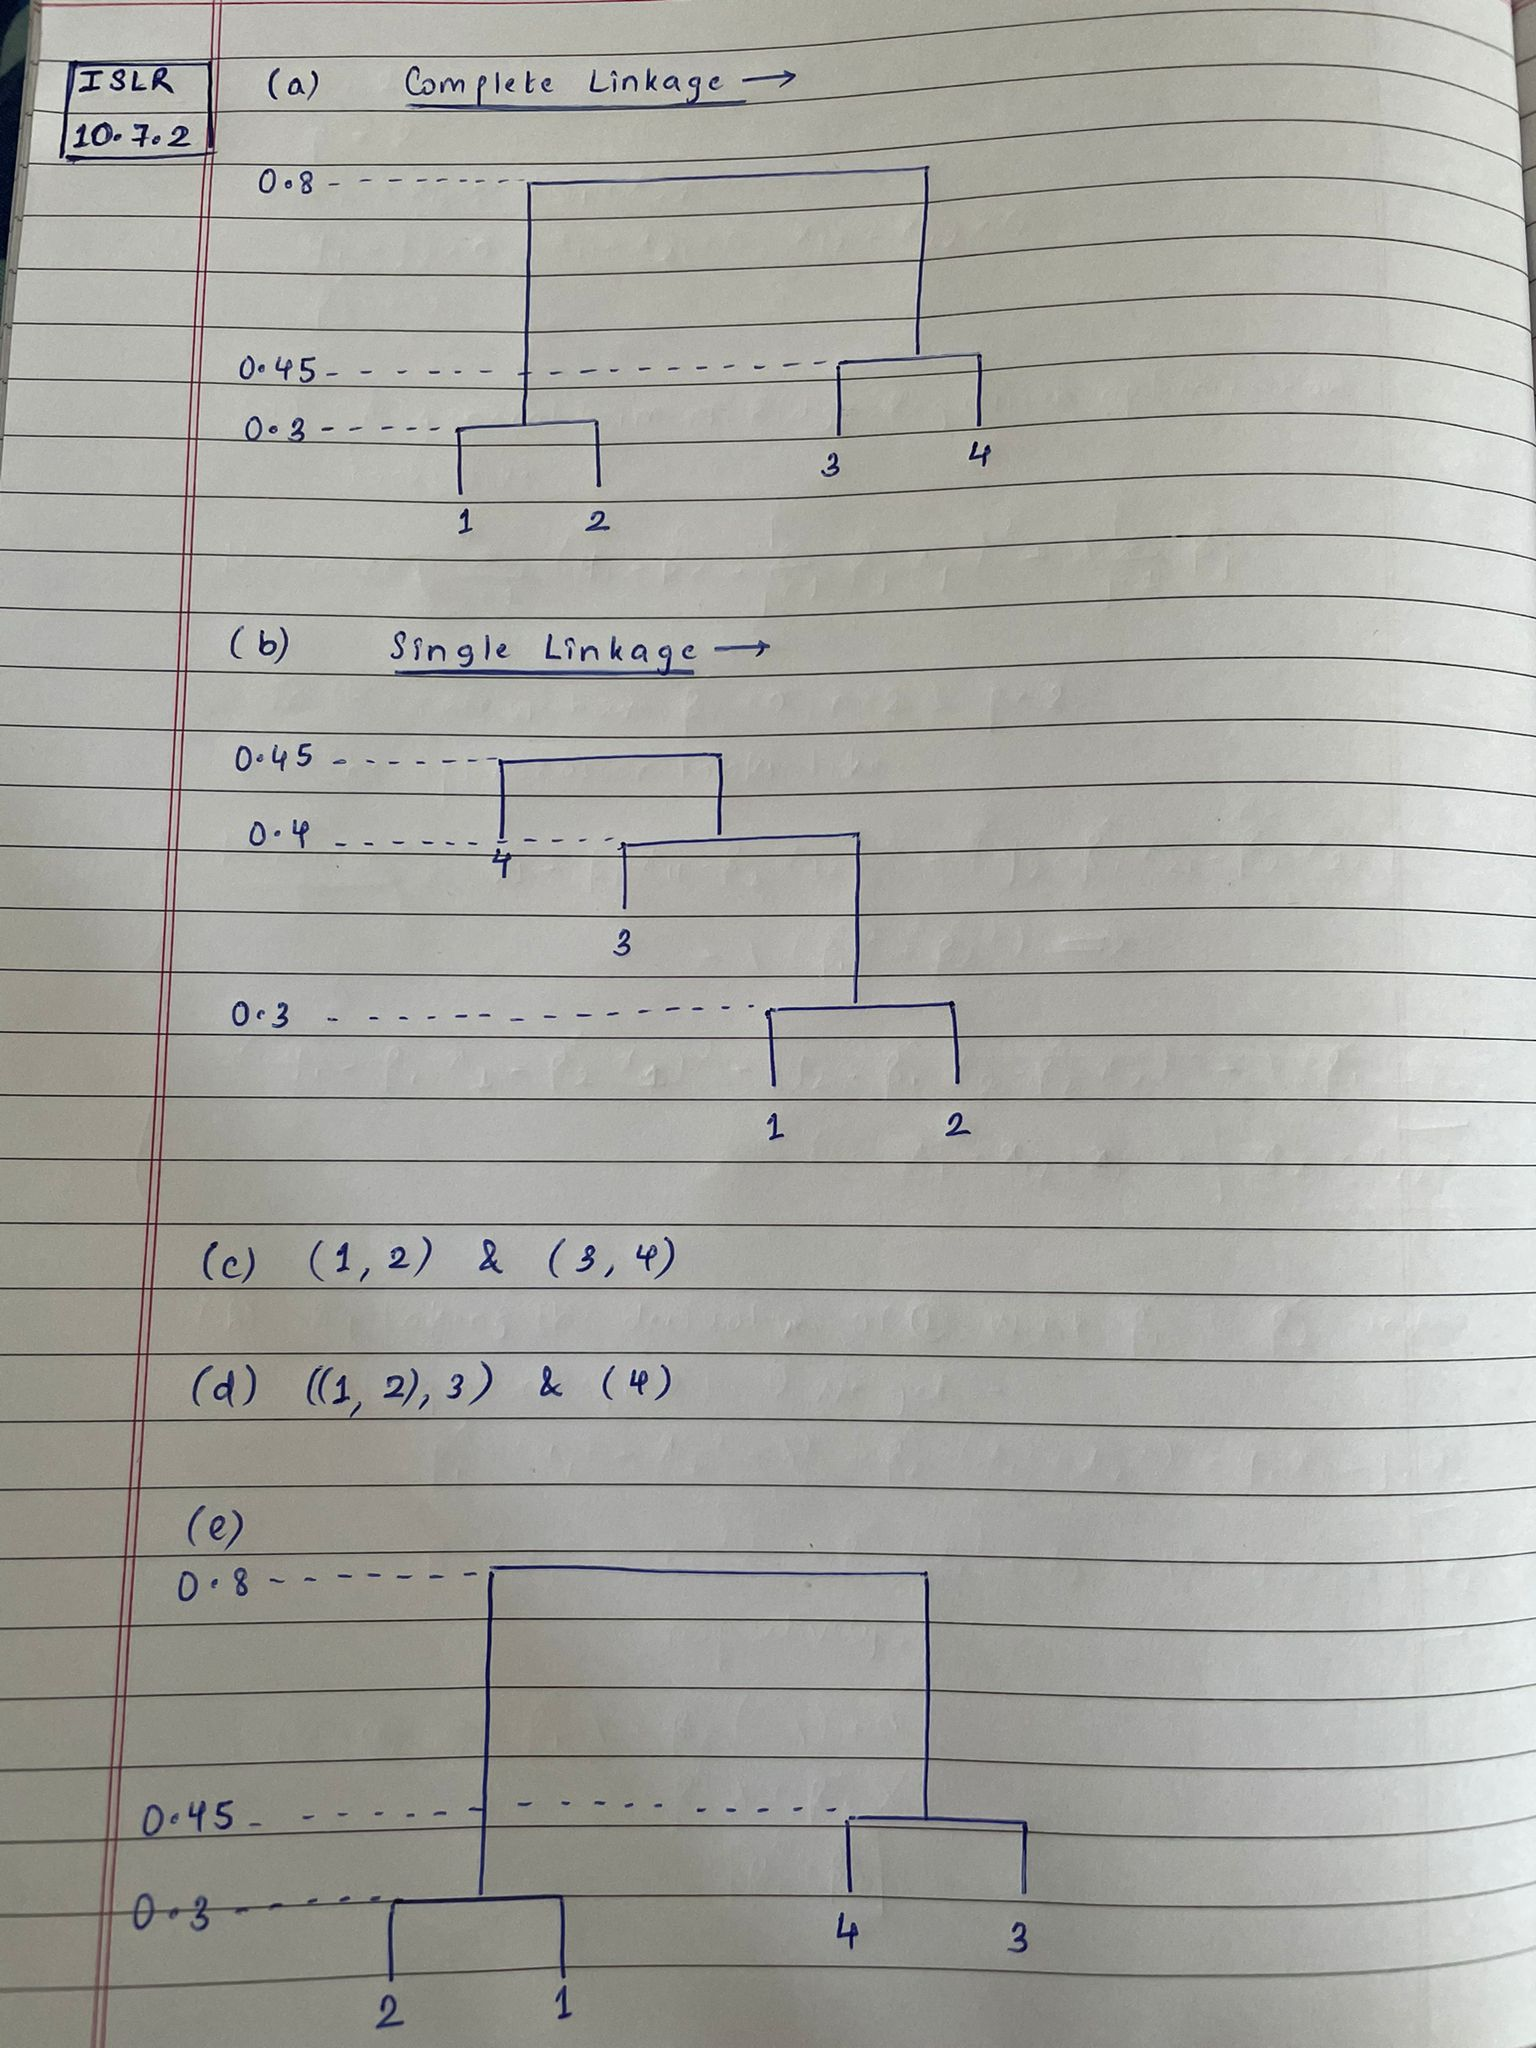

In [27]:
Image(filename="../notebook/images/1.jpeg")